In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# URL pro raw csv que ta no git
url = 'datasets/myo-movendo-luiza-2019-05-02 12:11:37-.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv(url)
#Normaliza e transforma em numpy array
Normalized_Data = preprocessing.normalize(Dataset)

print("Original Dataset")
print (Dataset.head())


print("\n\nNormalized Dataset")
print (Normalized_Data)


# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
Scaled_Data = scaler.fit_transform(Dataset)
Scaled_Data = pd.DataFrame(Scaled_Data)

print("\n\nScaled Dataset")
print (Scaled_Data.head)

Original Dataset
   Unnamed: 0     Timestamp  Sensor 0  Sensor 1  Sensor 2  Sensor 3  Sensor 4  \
0           0  1.556810e+09     149.0     207.0     258.0     275.0     366.0   
1           1  1.556810e+09     162.0     107.0     255.0     246.0     355.0   
2           2  1.556810e+09     162.0     107.0     255.0     246.0     355.0   
3           3  1.556810e+09     173.0      99.0     248.0     248.0     360.0   
4           4  1.556810e+09     173.0      99.0     248.0     248.0     360.0   

   Sensor 5  Sensor 6  Sensor 7  Gyro 0  Gyro 1  Gyro 2   Acc 1   Acc 2  Acc 3  
0     381.0     393.0     163.0  1933.0 -4578.0   894.0 -1041.0 -2668.0 -148.0  
1     398.0     330.0     152.0  1933.0 -4578.0   894.0 -1041.0 -2668.0 -148.0  
2     398.0     330.0     152.0  2335.0 -5089.0   753.0  -978.0 -2311.0   43.0  
3     400.0     279.0     151.0  2335.0 -5089.0   753.0  -978.0 -2311.0   43.0  
4     400.0     279.0     151.0  2451.0 -5344.0   509.0  -936.0 -1874.0  169.0  


Normaliz

/home/mois/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mois/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
Dataset["Variance"] = Dataset.var(axis=1)
Dataset["Mean"] = Dataset.mean(axis=1)
print("Mean")
print(Dataset.get("Variance").head(10))

print("\nVariance")
print(Dataset.get("Mean").head(10))


Mean
0    1.514786e+17
1    1.514786e+17
2    1.514786e+17
3    1.514786e+17
4    1.514786e+17
5    1.514786e+17
6    1.514786e+17
7    1.514786e+17
8    1.514786e+17
9    1.514786e+17
Name: Variance, dtype: float64

Variance
0    8.910506e+15
1    8.910506e+15
2    8.910506e+15
3    8.910506e+15
4    8.910506e+15
5    8.910506e+15
6    8.910506e+15
7    8.910506e+15
8    8.910506e+15
9    8.910506e+15
Name: Mean, dtype: float64


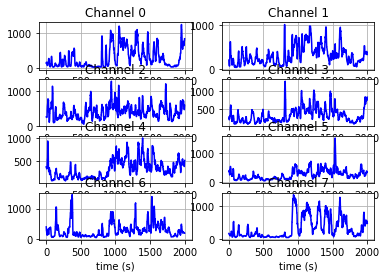

In [22]:
ax = np.linspace(0,2000,2000,endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

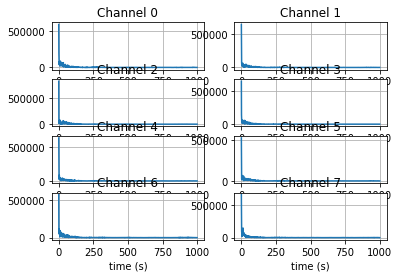

In [34]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(abs(np.fft.rfft(l)))
    plt.grid()

plt.draw()
plt.show()

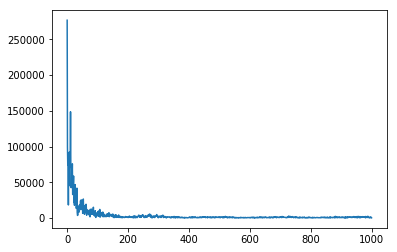

In [39]:
plt.plot(abs(np.fft.rfft(l)[1:]))